In [1]:
import pandas as pd
import numpy as np

In [2]:
from numpy.linalg import eigvals

In [3]:
x=np.random.randint(0,10,(2,2))
x

array([[0, 1],
       [4, 9]], dtype=int32)

In [4]:
eigval,eigvecs=np.linalg.eig(x)

In [5]:
eigval

array([-0.4244289,  9.4244289])

In [6]:
eigvecs

array([[-0.92052005, -0.10551491],
       [ 0.39069532, -0.99441772]])

In [7]:
x

array([[0, 1],
       [4, 9]], dtype=int32)

In [8]:
x_meaned=x-np.mean(x,axis=0)

In [9]:
x_meaned

array([[-2., -4.],
       [ 2.,  4.]])

## Covaraince

In [10]:
cov_mat=np.cov(x_meaned,rowvar=False)

In [11]:
cov_mat

array([[ 8., 16.],
       [16., 32.]])

## Eigen values and Eigen Vectors

In [12]:
eig_values,eig_vecs=np.linalg.eigh(cov_mat)

In [13]:
eig_values

array([ 0., 40.])

In [14]:
eig_vecs

array([[-0.89442719,  0.4472136 ],
       [ 0.4472136 ,  0.89442719]])

In [15]:
eig_vals=eig_values[np.argsort(eig_values)[::-1]]

In [16]:
eig_vecs=eig_vecs[:,np.argsort(eig_values)[::-1]]

In [17]:
components=eig_vecs[:,:1]
np.dot(x_meaned,components)

array([[-4.47213595],
       [ 4.47213595]])

In [18]:
import seaborn as sns
df=sns.load_dataset("titanic")

In [19]:
!pip install scikit-learn


Explained variance ratio: [0.2300211  0.21295421]
Total variance explained: 0.44297531136994317


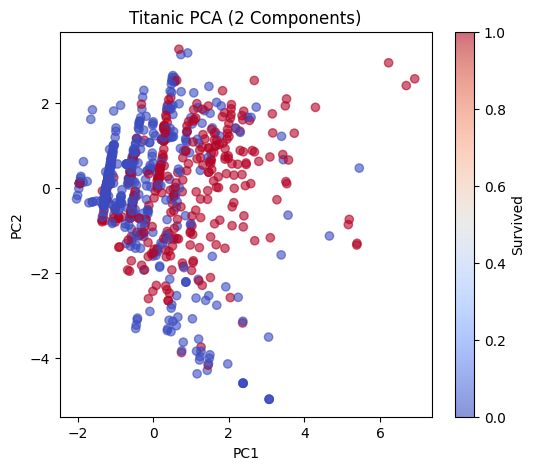

In [20]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# 1. Load Titanic dataset
df = sns.load_dataset("titanic")
df = df[['survived','pclass','sex','age','sibsp','parch','fare','embarked']]

# 2. Separate features and target
X = df.drop(columns=['survived'])
y = df['survived']

# 3. Handle missing values
for col in ['age','fare']:
    X[col] = X[col].fillna(X[col].median())
for col in ['sex','embarked']:
    X[col] = X[col].fillna(X[col].mode()[0])

# 4. One-hot encode categorical features
X = pd.get_dummies(X, columns=['sex','embarked'], drop_first=True)

# 5. Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())

# 7. Plot
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Titanic PCA (2 Components)")
plt.colorbar(label="Survived")
plt.show()


In [21]:
X_pca

array([[-1.03761866, -0.63084178],
       [ 1.84692588,  1.06006525],
       [-0.54905426, -0.38333981],
       ...,
       [ 0.81413196, -1.87635778],
       [ 0.31953347,  1.2994775 ],
       [-1.91106908,  0.27552716]], shape=(891, 2))